In [1]:
import numpy as np
import qiskit
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import matplotlib as mpl
import itertools

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator

In [3]:
def squares_data(X):
    Y = np.empty(len(X))
    for i,x in enumerate(X):
        if x[0] > 0 and x[1] > 0: Y[i] = 0
        elif x[0] > 0 and x[1] < 0: Y[i] = 1
        elif x[0] < 0 and x[1] > 0: Y[i] = 2
        else: Y[i] = 3
            
    return (X, Y)

In [4]:
grid = 10
grid = 10
x = np.linspace(-.9,.9,grid)
X = list(itertools.product(x, x))
X = np.asfarray(X)
Data = squares_data(X)

In [5]:
def draw_squares(Data, colorbar=False):
    X = Data[0]
    Y = Data[1]
    cmap = cm.get_cmap('brg')
    norm = mpl.colors.Normalize(vmin=0,vmax=3)
    fig, ax = plt.subplots()
    c=ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap, norm = norm)
    ax.plot([0,0], [-1,1], color='black')
    ax.plot([-1,1], [0,0], color='black')
    ax.set(xlim=[-1,1], ylim=[-1,1])
    ax.set_aspect('equal', 'box')
    if colorbar:
        fig.colorbar(c, ax = ax)
    return fig

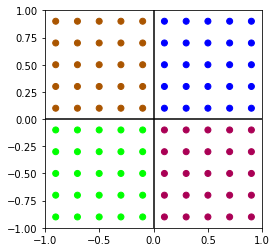

In [6]:
fig=draw_squares(Data)

In [7]:
def measurement_squares_2q(x, y, parameters, device):
    if len(parameters) % 10 != 0:
        raise ValueError('The number of parameters is not correct')
    qubits = 2
    layers = len(parameters) // 5 // 2
    parameters = parameters.reshape(qubits, layers, 5)
    C = QuantumCircuit(5,1)
    if y == 1:
        C.x(2)
    elif y == 2:
        C.x(3)
    elif y == 3:
        C.x(2)
        C.x(3)

    C.h(4)
    for l in range(layers - 1):
        for q in range(qubits):
            C.u3(parameters[q,l,0] * x[0] + parameters[q,l, 1],
                 parameters[q,l, 2] * x[1] + parameters[q,l, 3],
                 parameters[q,l, 4], q)
        C.cx(0,1)
    for q in range(qubits):
        C.u3(parameters[q,-1,0] * x[0] + parameters[q,-1, 1],
                 parameters[q,-1, 2] * x[1] + parameters[q,-1, 3],
                 parameters[q,-1, 4], q)

    C.cswap(4, 0, 2)
    C.cswap(4, 1, 3)
    C.h(4)

    C.measure(4,0)
    C.draw()
    # Select the QasmSimulator from the Aer provider,
    
    try:
        backend = Aer.get_backend(device)
    except:
        provider = IBMQ.get_provider()#hub='ibm-q')
        backend=provider.get_backend(dev)

    # Execute and get counts,
    sh = 1024
    result = execute(C, backend, shots=sh).result()
    counts = result.get_counts(C)
    fidelity = 2 * counts['0'] / sh - 1
    return fidelity
    

def check_squares_2q(x, parameters, device):
    Fidelities = np.zeros(4)
    for y in range(4):
        Fidelities[y] = measurement_squares_2q(x, y, parameters, device)
        
    return Fidelities

In [8]:
def cost_function_squares_2q(parameters, X, Y, device):
        chi2 = 0
        for x, y in zip(X, Y):
            chi2 += (1 - measurement_squares_2q(x, y, parameters, device))**2
            
        return chi2 / len(Y)

In [9]:
dev = 'qasm_simulator'

In [ ]:
layers=2
from scipy.optimize import minimize
parameters = np.random.rand(5*2*layers)

solution2 = minimize(cost_function_squares_2q,parameters, args=(Data[0], Data[1], dev), method='Powell')
solution2

In [10]:
layers=2
sol2=np.array([ 4.45129067e+00, -1.56875684e+00,  2.01933558e+00,  1.77740136e-01,
        8.78500962e-01,  1.79047190e+00, -1.76865802e-01,  1.57838726e+00,
        6.54460664e+00,  6.83160045e+00,  2.39327399e+00,  8.27917274e-03,
        1.47120756e-01,  3.70576157e-01, -1.02111974e+01, -2.68658232e-01,
       -1.15105832e+00, -2.31561508e-02,  9.81351719e+00, -1.34449687e+01])

In [ ]:
layers=3
from scipy.optimize import minimize
parameters = np.random.rand(5*2*layers)

solution3 = minimize(cost_function_squares_2q,parameters, args=(Data[0], Data[1], dev), method='Powell')
solution3

In [11]:
layers=3
sol3=np.array([ 0.06607868, -1.47318115,  0.99179411,  0.0186335 , -1.54075934,
       -3.01268191,  1.32373749,  0.0093197 , -1.4604332 ,  3.10745051,
       -2.55232083, -0.25882256,  1.33968079, -2.80508489,  1.07697963,
        0.54669349,  0.75734084, -2.21788686,  1.57259574, -0.57289583,
        0.35731731,  0.44065143,  1.27718811,  0.22387249,  5.74286817,
        0.93791628,  0.12577838, -0.02754623, -0.42773836,  4.87704546])

In [ ]:
layers=4
from scipy.optimize import minimize
parameters = np.random.rand(5*2*layers)

solution4 = minimize(cost_function_squares_2q,parameters, args=(Data[0], Data[1], dev), method='Powell')
solution4

In [12]:
layers=4
sol4=np.array([ 3.1898398 , -0.37025668, -1.73674639,  0.84073677,  1.15224075,
       -1.36204783,  1.07326992,  1.5908699 , -0.35888521,  4.52392772,
        0.45898233,  1.43217251,  1.63209173,  0.11613165,  4.04809762,
        2.04014856,  0.37932187,  0.89549906,  2.08417428, -0.53604735,
       -0.57343669, -0.22951699,  0.60406831, -2.51368728,  6.62893304,
        0.13499539,  1.45433562, -0.37528303, -0.21841795, -5.37530558,
       -0.04217691, -0.13016771,  0.65035978,  0.0128586 ,  3.03076242,
        0.55152724, -0.4460519 ,  0.02672925,  0.43853393,  0.94828499])

In [ ]:
layers=5
from scipy.optimize import minimize
parameters = np.random.rand(5*2*layers)

solution5 = minimize(cost_function_squares_2q,parameters, args=(Data[0], Data[1], dev), method='Powell')
solution5

In [13]:
layers=5
sol5=np.array([ 8.28873173e-01,  5.88256808e-01,  2.22790220e+00, -2.13979916e-01,
       -4.16913127e-01, -1.94147125e+00,  9.26795999e-01,  6.09683748e-01,
        1.40645880e-01,  1.56835179e+01,  1.67211776e+00,  4.30853872e-01,
        4.02343415e-01, -1.53428227e-01,  4.35068647e+00,  8.07221883e-01,
        2.47212258e-01,  9.35398337e-01, -5.05220821e-01,  3.94402119e+00,
       -4.07666813e-01,  1.36728158e+00,  9.98978477e-01, -5.44535629e+01,
        1.17085417e+01, -6.06856233e-01,  2.73826664e-01, -3.53898263e-01,
        1.11934070e+00, -3.41848180e-01,  1.25177133e-02,  4.76414413e-01,
       -3.75213923e-01, -4.36393734e-01,  5.44883302e+01, -1.23180096e+00,
        1.10944978e+00,  7.28155127e-01,  3.98446907e-01,  6.03413819e+00,
        4.90540125e-02,  2.69410376e-01, -3.18790950e-01,  6.67271477e-01,
        2.41327405e+00,  3.46193861e-01, -7.06961704e-01,  4.32356569e-01,
        1.00982334e+00,  3.33594588e+00])

In [17]:
layers=2
optimal_parameters=sol2

In [18]:
#grid

grid = 10
x = np.linspace(-.9,.9,grid)
X = list(itertools.product(x, x))
X = np.asfarray(X)
F = np.empty((len(X), 4))
for i, x in enumerate(X):
    fid = check_squares_2q(x, optimal_parameters, dev)
    F[i] = fid


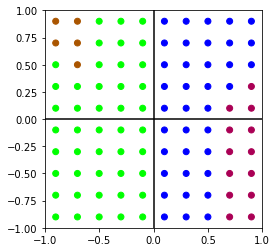

In [19]:
Z = np.argmax(F, axis=1)
fig=draw_squares((X, Z))


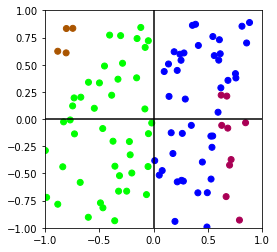

In [20]:
test = 100
X = 1.9 * np.random.rand(test, 2) - 1
Z = np.empty(test)
for i, x in enumerate(X):
    Z[i] = np.argmax(check_squares_2q(x, optimal_parameters, dev))
    
fig=draw_squares((X, Z), colorbar=False)


In [ ]:
from qiskit import IBMQ
IBMQ.load_account()
dev='ibmq_vigo'

In [ ]:
from qiskit import IBMQ
dev='ibmq_vigo'
def measurement_4classes_1qubitQ(x, y, parameters, device):
    if len(parameters) % 5 != 0:
        raise ValueError('The number of parameters is not correct')
    layers = len(parameters) // 5
    parameters = parameters.reshape(layers, 5)
    C = QuantumCircuit(3,1)
    theta = 2 * np.arccos(1/np.sqrt(3))
    if y == 1:
        C.u3(theta, 0, 0, 1)
    elif y == 2:
        C.u3(theta, 2 * np.pi / 3, 0, 1)
    elif y == 3:
        C.u3(theta, -2 * np.pi / 3, 0, 1)

    C.h(2)
    for l in range(layers):
        C.u3(parameters[l,0] * x[0] + parameters[l, 1], parameters[l, 2] * x[1] + parameters[l, 3], parameters[l, 2], 0)

    C.cswap(2, 0, 1)
    C.h(2)

    C.measure([2], [0])
    C.draw()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend=provider.get_backend(device)

    # Execute and get counts
    sh = 1024
    result = execute(C, backend, shots=sh).result()
    counts = result.get_counts(C)
    fidelity = 2 * counts['0'] / sh - 1
    return fidelity


def measurement_checkQ(x, parameters, device):
    fidelities = np.empty(4)
    for _ in range(4):
        fidelities[_]=measurement_4classes_1qubitQ(x, _, parameters, device)
        
    return np.argmax(fidelities)

In [ ]:
test = 50
X = 1.9 * np.random.rand(test, 2) - 1
Fq = np.empty((test, 4))

for i, x in enumerate(X):
    F[i] = measurement_checkQ([x[0], x[1]], optimal_parameters, dev)
    
fig=draw_squares((X, F), colorbar=False)

In [ ]:
from qiskit.visualization import plot_bloch_vector
psi0=[0,0,1]
psi1=[0,np.sqrt(2/3),-1/np.sqrt(3)]
psi2=[1/np.sqrt(2),-np.sqrt(1/6),-1/np.sqrt(3)]
psi3=[-1/np.sqrt(2),-np.sqrt(1/6),-1/np.sqrt(3)]
plot_bloch_vector([psi3, psi2, psi1, psi0], title="My Bloch Sphere")

In [ ]:
help(plot_bloch_vector)

In [ ]:
from qiskit.visualization.interactive import iplot_bloch_multivector
psi0=np.array([1,0])
psi1=1/np.sqrt(2)*np.array([1,1])
iplot_bloch_multivector(psi0)
iplot_bloch_multivector(psi1)